# Estadísticas II

In [2]:
import numpy as np
from scipy import stats 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### 1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:

In [3]:
pd.options.display.max_columns = None

In [4]:
df = pd.read_csv("datos/sephora_website_dataset.csv")
df.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,https://www.sephora.com/product/blu-mediterran...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,https://www.sephora.com/product/blu-mediterran...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,https://www.sephora.com/product/colonia-miniat...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


- Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo

- Percentiles 25, 75
  

In [5]:
# Con describe, nos devuelve la media, el mínimo, el máximo y los percentiles.

df["price"].describe()

count    9168.000000
mean       50.063237
std        47.164989
min         2.000000
25%        24.000000
50%        35.000000
75%        59.000000
max       549.000000
Name: price, dtype: float64

In [6]:
mediana = df["price"].median()
print(f"La mediana del precio es {mediana}")

La mediana del precio es 35.0


In [30]:
moda = df["price"].mode()[0]
print(f"El precio más repetido es {moda}")

El precio más repetido es 25.0


In [22]:
df["rating"].describe()

count    9168.000000
mean        3.990020
std         1.007707
min         0.000000
25%         4.000000
50%         4.000000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

In [23]:
mediana = df["rating"].median()
print(f"La mediana de la puntuación es {mediana}")

La mediana de la puntuación es 4.0


In [31]:
moda = df["rating"].mode()[0]
print(f"La puntuación más repetida es {moda}")

La puntuación más repetida es 4.5


- Rango Intercualtílico

In [8]:
q3, q1 = np.percentile(df["price"], [75,25])
iqr = q3 - q1
print(f"El rango intercuartícilo del precio es {iqr}")

El rango intercuartícilo del precio es 35.0


- Boxplot de algunas variables

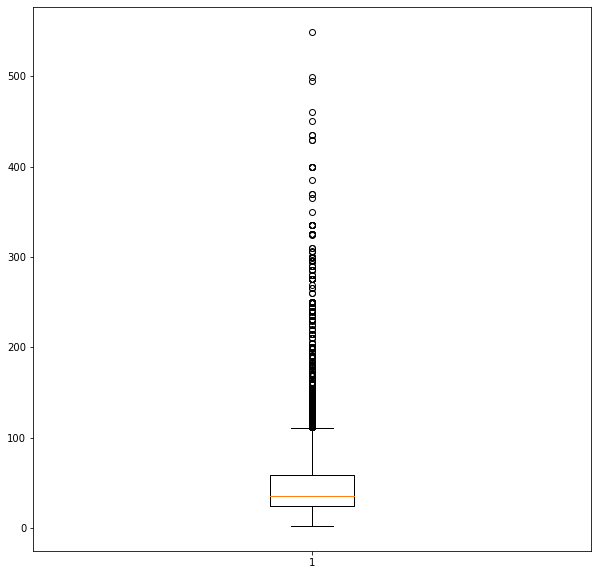

In [32]:
fig = plt.figure(figsize = (10, 10))
plt.boxplot(df["price"]);

- En la gráfica vemos cómo la mayoria de los precios, se encuentran por encima del 25% de la muestra. Y encontramos tantos outliers, que podríamos decir que se dividen en dos grupos; los que se encuentran dentro del rango interquartil, y los que superan con creces el 75% de la muestra.

In [35]:
mediana = df["rating"].median()
mediana

4.0

In [36]:
df["rating"].describe()

count    9168.000000
mean        3.990020
std         1.007707
min         0.000000
25%         4.000000
50%         4.000000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

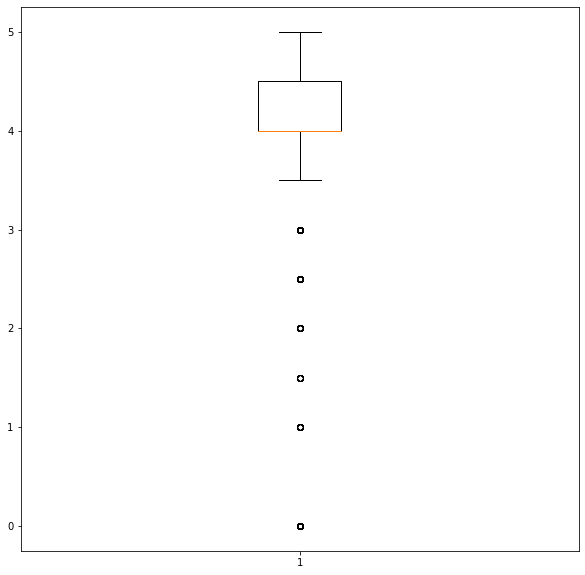

In [33]:
fig = plt.figure(figsize = (10, 10))
plt.boxplot(df["rating"]);

- En este caso, vemos cómo la mediana (4.0) está muy cerca del valor máximo (5.0). Es lógico entonces, que haya tantos outliers, puesto que cualquier producto que esté por debajo del primer cuartil (4.0) será considerado un valor extremo. Lo que podría indicar que la gente está muy satisfecha con los productos, o que sólo dejan en la web los productos mejor valorados.

### Tabla de frecuencias

- Variables cualitativas 

In [41]:
df1 = pd.DataFrame(df["brand"].value_counts())
df1.head()


,brand
SEPHORA COLLECTION,496
CLINIQUE,234
tarte,170
TOM FORD,161
Dior,145


In [43]:
df2 = pd.DataFrame(df["category"].value_counts())
df2.head()


,category
Perfume,665
Moisturizers,451
Face Serums,384
Value & Gift Sets,378
Face Wash & Cleansers,247


- Variables cuantitativas

In [44]:
df3 = pd.DataFrame(df["rating"].value_counts())
df3.head()

,rating
4.5,3527
4.0,2853
3.5,1051
5.0,872
0.0,398


In [59]:
df3.columns

Index(['rating'], dtype='object')

In [45]:
df4 = pd.DataFrame(df["price"].value_counts())
df4.head()

,price
25.0,346
28.0,334
30.0,333
29.0,259
38.0,255


- Frecuencia acumulada

In [49]:
df5 = pd.DataFrame(df["price"].value_counts().cumsum())
df5.head()

,price
25.0,346
28.0,680
30.0,1013
29.0,1272
38.0,1527


- Representación de al menos una tabla de frecuencias

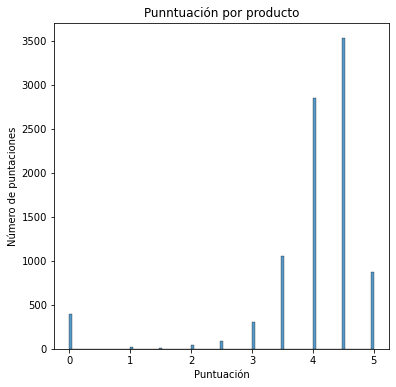

In [85]:
plt.figure(figsize = (6,6))

fig = sns.histplot(data = df, x = "rating", palette = "Set2")

fig.set(xlabel = "Puntuación", ylabel = "Número de puntaciones")

fig.set_title("Punntuación por producto")

plt.show()

- En esta gráfica, vemos cómo las puntuaciones se concentran en los rangos más altos. Lo mismo que hemos visto en nuestro boxplot anterior.

### 2. Interpretación de los resultados.
Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.